In [1]:
#!g2.mig
%load_ext autoreload
%autoreload 2

In [2]:
#!g2.mig
from datasets import load_dataset
from scripts.preprocessing import process, plot_data
from scripts.dataset import TextDataset
from IPython.display import clear_output
import torch
from torch import nn
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from scripts.model import LanguageModel
from scripts.train import train 


dataset = load_dataset("app_reviews")['train']
processed_dataset = process(dataset)
train_dataset = processed_dataset.filter(lambda example: example['sample'] != 'test')
train_set = TextDataset(train_dataset, split = 'train')
valid_set = TextDataset(train_dataset, split = 'validation')
clear_output()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# plot_data(dataset)

## RNN

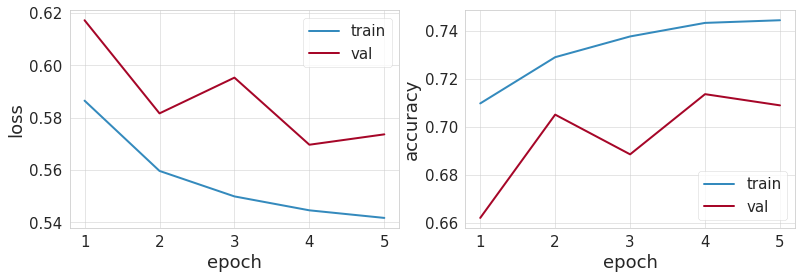

[tensor(0.6620), tensor(0.7050), tensor(0.6885), tensor(0.7136), tensor(0.7089)] [0.7097204133601172, 0.7289892302619086, 0.7376343908275754, 0.7432831365575072, 0.7443870783279446]


In [68]:
#!g2.mig
NUM_EPOCHS = 5
BATCH_SIZE = 100
WEIGHT_DECAY = 1e-3
LR = 1e-3
RNN_TYPE = nn.RNN

model = LanguageModel(train_set, rnn_type = RNN_TYPE).to(device)
optimizer = Adam(model.parameters(), lr = LR, weight_decay = WEIGHT_DECAY)

train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE, shuffle=True)

train(
    model=model,
    model_name='rnn',
    optimizer=optimizer,
    scheduler=None,
    train_loader=train_loader,
    val_loader=valid_loader,
    num_epochs=NUM_EPOCHS
)

## LSTM


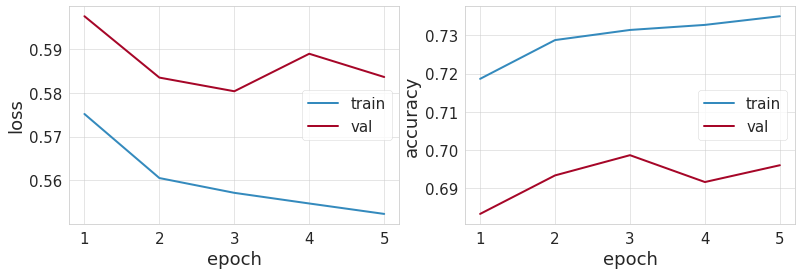

In [3]:
#!g2.mig
NUM_EPOCHS = 5
BATCH_SIZE = 100
WEIGHT_DECAY = 1e-3
LR = 1e-3
RNN_TYPE = nn.LSTM

model = LanguageModel(train_set, rnn_type = RNN_TYPE).to(device)
optimizer = Adam(model.parameters(), lr = LR, weight_decay = WEIGHT_DECAY)

train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE, shuffle=True)

train(
    model=model,
    model_name='lstm',
    optimizer=optimizer,
    scheduler=None,
    train_loader=train_loader,
    val_loader=valid_loader,
    num_epochs=NUM_EPOCHS,
    
)

## GRU

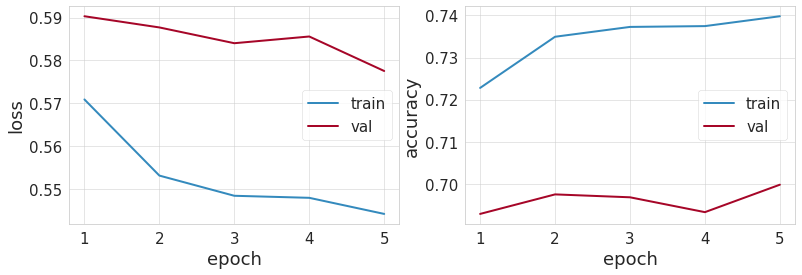

In [92]:
#!g2.mig
NUM_EPOCHS = 5
BATCH_SIZE = 100
WEIGHT_DECAY = 1e-3
LR = 1e-3
RNN_TYPE = nn.GRU

model = LanguageModel(train_set, rnn_type = RNN_TYPE).to(device)
optimizer = Adam(model.parameters(), lr = LR, weight_decay = WEIGHT_DECAY)

train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE, shuffle=True)

train(
    model=model,
    model_name='gru',
    optimizer=optimizer,
    scheduler=None,
    train_loader=train_loader,
    val_loader=valid_loader,
    num_epochs=NUM_EPOCHS
)